<a href="https://colab.research.google.com/github/AbdullahAlTalaq/About-Me/blob/main/Price_analysis_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv("/content/Melbourne_housing_FULL.csv")

In [ ]:
dataframe.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
dataframe.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"],dayfirst=True)
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
var = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

<ipython-input-13-ae6923b065b3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
<ipython-input-13-ae6923b065b3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()


<Axes: xlabel='Date'>

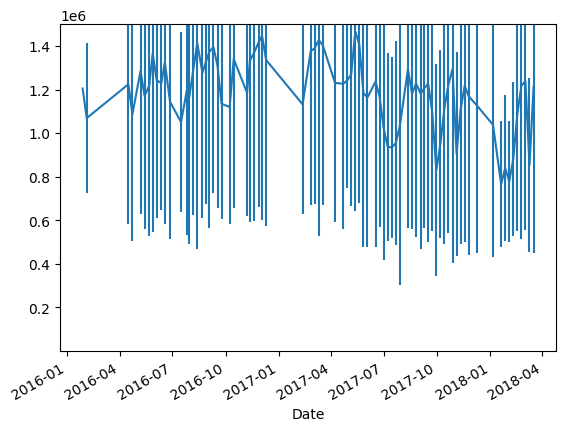

In [ ]:
mean["Price"].plot(yerr=var["Price"],ylim=(40000,1500000))

In [ ]:
means = dataframe[(dataframe["Type"]=="h") & (dataframe["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()
errors = dataframe[(dataframe["Type"]=="h") & (dataframe["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()

<ipython-input-49-463f3c2f940e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = dataframe[(dataframe["Type"]=="h") & (dataframe["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()
<ipython-input-49-463f3c2f940e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  errors = dataframe[(dataframe["Type"]=="h") & (dataframe["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()


In [ ]:
means.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,3.000000,1.124714e+06,8.688235,3073.294118,2.769231,1.153846,1.846154,490.307692,118.000000,1957.250000,-37.806131,144.981592,6136.352941
2016-04-16,3.286458,1.287161e+06,7.984896,3089.192708,3.063291,1.664557,1.613924,454.500000,158.781250,1937.743119,-37.800734,144.987069,7469.192708
2016-04-23,3.131313,1.088778e+06,8.172727,3076.838384,2.987013,1.415584,1.480519,944.168831,139.902439,1935.581395,-37.786594,144.971627,7652.090909
2016-05-07,3.259259,1.353393e+06,8.200823,3098.473251,3.136364,1.616162,1.595960,550.227273,168.636364,1940.796992,-37.811696,144.995253,7192.818930


In [ ]:
 means.drop(["Price",
            "Postcode",

           "Longtitude","Lattitude",
           "Distance","BuildingArea", "Propertycount","Landsize","YearBuilt"])


KeyError: ignored

In [ ]:
means.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,3.000000,1.124714e+06,8.688235,3073.294118,2.769231,1.153846,1.846154,490.307692,118.000000,1957.250000,-37.806131,144.981592,6136.352941
2016-04-16,3.286458,1.287161e+06,7.984896,3089.192708,3.063291,1.664557,1.613924,454.500000,158.781250,1937.743119,-37.800734,144.987069,7469.192708
2016-04-23,3.131313,1.088778e+06,8.172727,3076.838384,2.987013,1.415584,1.480519,944.168831,139.902439,1935.581395,-37.786594,144.971627,7652.090909
2016-05-07,3.259259,1.353393e+06,8.200823,3098.473251,3.136364,1.616162,1.595960,550.227273,168.636364,1940.796992,-37.811696,144.995253,7192.818930
